# Экономическая оптимизация восстановления

In [1]:
# Импорт библиотек и настройка среды
%matplotlib inline
%precision 3
from numpy import matrix, linspace, ravel

from IPython.display import Image
%config InlineBackend.figure_formats = ['svg']  #установить векторный формат для графиков

## Постановка задачи

Некоторая техническая система состоит из двух одинаковых блоков. Для работоспособности
системы достаточно только одного блока, однако второй постоянно включен в режиме горячего
резерва. Если оба блока работают, то нагрузка равномерно распределяется между ними.

Характеристики надежности блоков: средняя наработка на отказ $\bar{t} = 1000$ часов, среднее время
восстановления отказавшего блока - $t_в = 50$ часов.

Для обслуживания системы имеется одна ремонтная бригада, которая может одновременно
восстанавливать один блок.

Час простоя системы при отказе обоих блоков обходится в 200 тыс. рублей.
Затраты на содержание ремонтной бригады составляют 1 200 тыс. рублей в год (заработная плата
инженера и двух рабочих + расходные материалы).

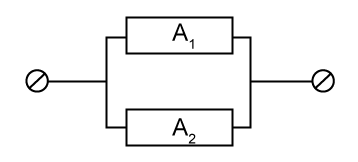

In [2]:
Image('pics/2app.png', embed=True)


Интенсивность отказов и восстановления аппаратов: 

$$\lambda = \frac{1}{\bar{t}}$$


$$\mu = \frac{1}{t_в} $$


Потоки событий в системе - простейшие.

In [3]:
lambda1 = 1/1000 #Интенсивность отказов
mu1 = 1/50 #Интенсивность восстановления
C_prost = 200 #затраты из-за простоя системы, тыс. руб/час
C_brig = 1200 #затраты на содержание ремонтной бригады

## Моделирование системы с одной обслуживающей бригадой

### Граф состояний

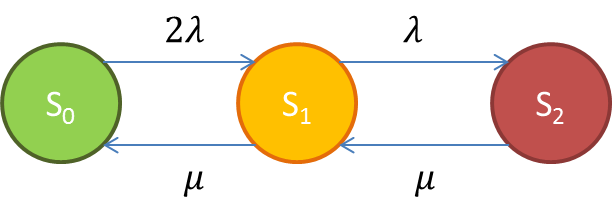

In [4]:
Image('pics/econom_1br.png', embed=True)


 - $S_0$ - оба аппарата исправны
 - $S_1$ - отказал 1 аппарат
 - $S_2$ - отказ системы

### Система уравнений Колмогорова
\begin{equation}
    \left\{
        \begin{aligned}
            -2\lambda_1 P_0 +  \mu_1 P_1 & = 0 \\
            2\lambda_1 P_0 - (\mu_1 + \lambda_1) P_1 + \mu_1 P_2 & = 0\\
            P_0 + P_1 + P_2 & = 1\\
        \end{aligned}
    \right.
\end{equation}

Предельные вероятности состояний можно найти, решив систему линейных уравнений для стационарного режима

In [5]:
A = matrix([[-2*lambda1, mu1, 0],
            [2*lambda1, -(mu1 + lambda1), mu1],
            [1, 1, 1]]
           )

B = matrix([[0],
            [0],
            [1]])

P = A.I * B

# В результате решения системы получается вектор-столбец - матрица с 2 строками и 1 столбцом
# здесь она преобразуется в одномерный массив для упрощения индексации
P = ravel(P) 

print('Предельные вероятности состояний: P = ', P)

Предельные вероятности состояний: P =  [0.905 0.09  0.005]


###Расчет экономических показателей

In [6]:
#Время простоя, часов в год

T = 365 * 24 #число часов в году

prostoi1 = P[2] * T
prostoi1

39.638009049773835

In [7]:
#Совокупные затраты - потери из-за простоя системы + содержание одной ремонтной бригады
zatraty1 = prostoi1 * C_prost + C_brig
zatraty1

9127.601809954767

## Моделирование системы с двумя обслуживающими бригадами

### Граф состояний для системы с двумя обслуживающими бригадами

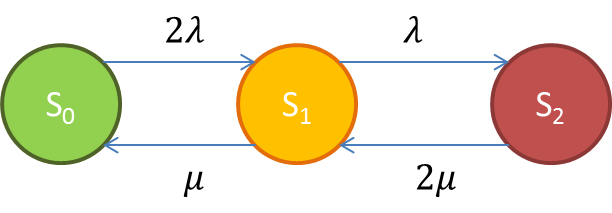

In [8]:
Image('pics/econom_2br.png', embed=True)

 - $S_0$ - оба аппарата исправны
 - $S_1$ - отказал 1 аппарат
 - $S_2$ - отказ системы

### Система уравнений Колмогорова
\begin{equation}
    \left\{
        \begin{aligned}
            -2\lambda_1 P_0 +  \mu_1 P_1 & = 0 \\
            2\lambda_1 P_0 - (\mu_1 + \lambda_1) P_1 + 2\mu_1 P_2 & = 0\\
            P_0 + P_1 + P_2 & = 1\\
        \end{aligned}
    \right.
\end{equation}

In [9]:
A = matrix([[-2*lambda1, mu1, 0],
            [2*lambda1, -(mu1 + lambda1), 2*mu1],
            [1, 1, 1]]
           )

B = matrix([[0],
            [0],
            [1]])

P = A.I * B

# В результате решения системы получается вектор-столбец - матрица с 2 строками и 1 столбцом
# здесь она преобразуется в одномерный массив для упрощения индексации
P = ravel(P) 

print('Предельные вероятности состояний: P = ', P)

Предельные вероятности состояний: P =  [0.907 0.091 0.002]


In [10]:
prostoi2 = P[2] * T
print("Простой: %d час" % prostoi2)

Простой: 19 час


In [11]:
zatraty2 = prostoi2 * C_prost + 2 * C_brig
print("Затраты для системы с двумя бригадами: %d тыс. руб." % zatraty2)

Затраты для системы с двумя бригадами: 6372 тыс. руб.


In [12]:
print("Затраты для системы с одной бригадой: %d тыс. руб." % zatraty1)

Затраты для системы с одной бригадой: 9127 тыс. руб.


In [13]:
#Экономия, тыс. рублей
print("Экономия: %d тыс. руб." % (zatraty1 - zatraty2))

Экономия: 2754 тыс. руб.
